### **Lab 04: Data Preprocessing**

In [34]:
from google.colab import drive
drive.flush_and_unmount()
print('All changes made in this colab session should now be visible in Drive.')

All changes made in this colab session should now be visible in Drive.


The following code cell installs additional dependencies required to run the Jupyter Notebooks used in this class.

In [40]:
# Add additional Python packages that we will be using in class
!apt install graphviz build-essential checkinstall imagemagick
# Base Python packages to run example Jupyter Notebooks
!pip install watermark pyprind mlxtend
# Python packages to visualize Decision Tree Classifiers
!pip install pydotplus graphviz pyparsing
# Python packages for Natrual Language Processing
!pip install nltk
# Python packages for Flask-based web applications
!pip install flask wtforms
# Python packages for TensorFlowdf.select_dtypes(include=['int64','float64']).columns
!pip install tensorflow tensorflow-datasets

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
checkinstall is already the newest version (1.6.2-4ubuntu2).
graphviz is already the newest version (2.40.1-2).
imagemagick is already the newest version (8:6.9.7.4+dfsg-16ubuntu6.11).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


The following code cell defines a variable equal to the location inside your Google Drive where you copied the ch03 folder

In [41]:
##### TODO CHANGE THIS TO THE PATH IN GOOGLE DRIVE WHERE YOU COPIED THE ch03 FOLDER #####
google_drive_root='/Colab Notebooks/ch04'

In [42]:
google_drive_mount_location = '/content/drive'
google_file_prefix=google_drive_mount_location + '/My Drive/' + google_drive_root + '/'

The following code cell mounts your Google Drive into the runtime of the workbook, so that you can access files.

In [43]:
# Read more here: https://colab.research.google.com/notebooks/io.ipynb#scrollTo=D78AM1fFt2ty
from google.colab import drive
drive.mount(google_drive_mount_location)

Mounted at /content/drive


In [44]:
%load_ext watermark
%watermark -a "Sebastian Raschka" -u -d -p numpy,pandas,matplotlib,sklearn

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Author: Sebastian Raschka

Last updated: 2021-10-19

numpy     : 1.19.5
pandas    : 1.1.5
matplotlib: 3.2.2
sklearn   : 0.0



In [45]:
!pip install seaborn
!pip install sklearn

In [46]:
from IPython.display import Image
import pandas as pd
import numpy as np
import seaborn as sns

## 1. Data Collection

In [47]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data', header=None)

In [48]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


## **2. Data Preprocessing**

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    object 
 1   1       690 non-null    object 
 2   2       690 non-null    float64
 3   3       690 non-null    object 
 4   4       690 non-null    object 
 5   5       690 non-null    object 
 6   6       690 non-null    object 
 7   7       690 non-null    float64
 8   8       690 non-null    object 
 9   9       690 non-null    object 
 10  10      690 non-null    int64  
 11  11      690 non-null    object 
 12  12      690 non-null    object 
 13  13      690 non-null    object 
 14  14      690 non-null    int64  
 15  15      690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [50]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
dtype: int64

In [51]:
df.replace({'?':np.nan})

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


In [52]:
df[15].unique()

array(['+', '-'], dtype=object)

In [53]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
dtype: int64

# Sweet. No missing values. Let's map the categorical labels

In [54]:
nums = df.select_dtypes(include=['int64','float64']).columns
print(nums)

Int64Index([2, 7, 10, 14], dtype='int64')


In [55]:
num_df = df[[2, 7, 10, 14]]

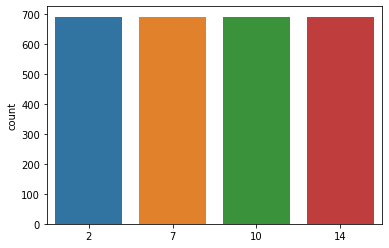

In [56]:
sns.countplot(data=num_df)

In [57]:
cats = df.select_dtypes(include=['object']).columns
print(cats)

Int64Index([0, 1, 3, 4, 5, 6, 8, 9, 11, 12, 13, 15], dtype='int64')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


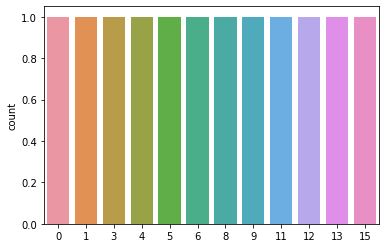

In [58]:
sns.countplot(cats)

In [59]:
df_dummies = pd.get_dummies(df, drop_first=True)

In [60]:
df_dummies.head(10)

,2,7,10,14,0_a,0_b,1_15.17,1_15.75,1_15.83,1_15.92,1_16.00,1_16.08,1_16.17,1_16.25,1_16.33,1_16.50,1_16.92,1_17.08,1_17.25,1_17.33,1_17.42,1_17.50,1_17.58,1_17.67,1_17.83,1_17.92,1_18.00,1_18.08,1_18.17,1_18.25,1_18.33,1_18.42,1_18.50,1_18.58,1_18.67,1_18.75,1_18.83,1_18.92,1_19.00,1_19.17,...,13_00411,13_00416,13_00420,13_00422,13_00431,13_00432,13_00434,13_00440,13_00443,13_00450,13_00454,13_00455,13_00460,13_00465,13_00470,13_00480,13_00487,13_00491,13_00500,13_00510,13_00515,13_00519,13_00520,13_00523,13_00550,13_00560,13_00583,13_00600,13_00640,13_00680,13_00711,13_00720,13_00760,13_00840,13_00928,13_00980,13_01160,13_02000,13_?,15_-
0,0.000,1.250,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4.460,3.040,6,560,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.500,1.500,0,824,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.540,3.750,5,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5.625,1.710,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,4.000,2.500,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1.040,6.500,0,31285,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,11.585,0.040,0,1349,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0.500,3.960,0,314,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,4.915,3.165,0,1442,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Need to scale just the numerical features and concatenate it to the one-hot encoded data.

In [61]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
#df_nums_std = sc.fit_transform(num_df)

## Note: the above line will produce df_nums_std as a numpy array instead of a Pandas Dataframe. SKLearn operates only on Pandas dfs

df_nums_std = pd.DataFrame(sc.fit_transform(num_df), columns=num_df.columns, index=num_df.index)

In [62]:
df_dummies = df_dummies.drop([2, 7, 10, 14], axis=1)

In [35]:
df_dummies = pd.concat([df_dummies,df_nums_std], axis=1)

In [36]:
X = df_dummies.drop('15_-', axis=1)
y = df_dummies['15_-'].values

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [38]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [307 383]
Labels counts in y_train: [215 268]
Labels counts in y_test: [ 92 115]


 1) 9_t                            0.182290
 2) 10                             0.080960
 3) 7                              0.078060
 4) 14                             0.066594
 5) 2                              0.058675
 6) 11_t                           0.052826
 7) 6_j                            0.013339
 8) 6_bb                           0.011860
 9) 12_p                           0.011497
10) 5_r                            0.009096
11) 4_g                            0.008572
12) 6_z                            0.008484
13) 5_i                            0.008258
14) 6_h                            0.008250
15) 5_aa                           0.008044
16) 0_b                            0.007871
17) 1_15.17                        0.007475
18) 3_y                            0.007339
19) 5_d                            0.007138
20) 13_00017                       0.007102
21) 4_gg                           0.007056
22) 5_cc                           0.006723
23) 5_m                         

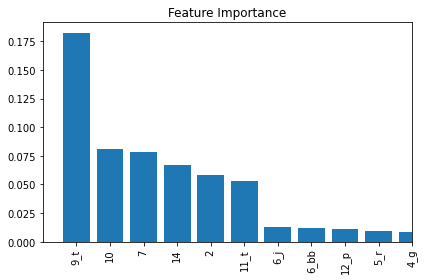

In [39]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

feat_labels = df_dummies.columns[1:]

forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)

forest.fit(X,y)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, 10])
plt.tight_layout()
#plt.savefig(google_file_prefix + 'images/04_09.png', dpi=300)
plt.show()

**Looks like 9_t, 10, 14, 0_a, and 7 were the top 5 most important features when I didn't standardize the numerical features.**

**Now 6_o, 13_?, 13_02000, 15_-, 13_01160 are the top 5.**

9_t, 10, 7, 14, 2

In [63]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

In [64]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest, threshold=0.05, prefit=True)
X_selected = sfm.transform(X_train)
print('Number of features that meet this threshold criterion:', 
      X_selected.shape[1])

Number of features that meet this threshold criterion: 6


In [65]:
for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

 1) 9_t                            0.182290
 2) 10                             0.080960
 3) 7                              0.078060
 4) 14                             0.066594
 5) 2                              0.058675
 6) 11_t                           0.052826


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3, 
                           p=2, 
                           metric='minkowski')
knn.fit(X_train, y_train)

plot_decision_regions(X_train2, y_train2, classifier=knn, test_idx=None)

plt.xlabel(' ')
plt.ylabel('petal width [standardized]')

plt.tight_layout()
plt.show()

TypeError: ignored

In [ ]:
X_top5 = df_dummies[['9_t',10,7,14,2,'11_t']]
X_top5 = X_top5.reshape(1,-1)

AttributeError: ignored

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_top5, y, test_size=0.3, random_state=1, stratify=y)

In [ ]:
len(X_train2)

print(len(y_train2))

483


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3, 
                           p=2, 
                           metric='minkowski')
knn.fit(X_train2, y_train2)

plot_decision_regions(X_train2, y_train2, classifier=knn)

plt.xlabel(' ')
plt.ylabel('')

plt.tight_layout()
#plt.savefig(google_file_prefix + 'images/03_01.png', dpi=300)
plt.show()

TypeError: ignored